In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path
import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from src.support_booking import soup_to_df, scrap_url

We will be traveling from December 22nd to 29th and are seeking a reservation for one adult. Our goal is to create meaningful experiences for individuals who want to rediscover the magic of Christmas.

We are going to scrap Budapest and Barcelona in Booking.com. Here we have the `dest_id`:

Budapest: -850553

Barcelona: -372490

In [3]:
soup_bud = scrap_url(-850553, '2024-12-22', '2024-12-29')
df_bud = soup_to_df(soup_bud)

No more loading available
https://www.booking.com/searchresults.es.html?lang=es&dest_id=-850553&dest_type=city&checkin=2024-12-22&checkout=2024-12-29&group_adults=1&no_rooms=1&group_children=0


In [5]:
soup_bcn = scrap_url(-372490, '2024-12-22', '2024-12-29')
df_bcn = soup_to_df(soup_bcn)

No more loading available
https://www.booking.com/searchresults.es.html?lang=es&dest_id=-372490&dest_type=city&checkin=2024-12-22&checkout=2024-12-29&group_adults=1&no_rooms=1&group_children=0


In [52]:
df_bud.to_csv("../data/hotels_budapest.csv", index = False)
df_bcn.to_csv("../data/hotels_barcelona.csv", index = False)

---

In [53]:
df_bud = pd.read_csv("../data/hotels_budapest.csv")
df_bcn = pd.read_csv("../data/hotels_barcelona.csv")

In [54]:
df_bud.describe().T

,count,mean,std,min,25%,50%,75%,max
Distance to center,930.0,1.686828,1.793856,0.05,0.80,1.2,1.900,16.4
Score,880.0,8.452386,1.095307,1.00,8.00,8.6,9.125,10.0
Location score,698.0,9.012751,0.573690,8.00,8.60,9.0,9.500,10.0
Price (€),930.0,810.863441,373.857487,110.00,606.25,762.0,968.500,4923.0


In [10]:
df_bcn.describe().T

,count,mean,std,min,25%,50%,75%,max
Distance to center,51.0,2.077451,1.229850,0.45,1.25,1.6,2.60,5.2
Score,51.0,8.309804,0.497295,7.00,8.10,8.3,8.65,9.9
Location score,43.0,8.816279,0.334472,8.10,8.60,8.8,9.00,9.7
Price (€),51.0,819.392157,434.197010,175.00,626.00,834.0,941.50,2383.0


`Budapest (BUD)`:
- `Distance to center`: Average distance is 1.69 km, with a wide range (0.05 km to 16.4 km), showing a mix of central and far locations.
- `Score`: Average rating is 8.45, ranging from 1.0 to 10, indicating generally high ratings with some variability.
- `Location score`: Very high, averaging 9.01, with low variability (8.0 to 10).
- `Price`: The average price is €810.86, with a wide range from €110 to €4923, indicating a large price disparity.

`Barcelona (BCN)`:
- `Distance to center`: Average distance is 2.08 km, slightly farther from the center than Budapest, but with less variability (0.45 km to 5.2 km).
- `Score`: Average rating is 8.31, with a smaller range (7.0 to 9.9), showing more consistency.
- `Location score`: High and consistent, averaging 8.82 (range: 8.1 to 9.7).
- `Price`: The average price is €819.39, with less variability than Budapest (range: €175 to €2383).

Both cities have high location scores and generally positive ratings, with Budapest showing more price extremes.

In [11]:
df_bud.sort_values(by=['Score', 'Price (€)'], ascending=[False, True]).head()

,Name,Address,Distance to center,Score,Location score,Price (€),Link
128,Benetton stlye - freedom in blue and organge,"09. Ferencváros, Budapest",1.8,10.0,10.0,430.0,https://www.booking.com/hotel/hu/benetton-stly...
120,Balcony - Sunny - Modern,"11. Újbuda, Budapest",3.4,10.0,10.0,503.0,https://www.booking.com/hotel/hu/free-parking-...
695,Zippy Home of Harmony,"07. Erzsébetváros, Budapest",0.5,10.0,10.0,552.0,https://www.booking.com/hotel/hu/zippy-home-of...
349,Free Parking - Central - Quiet,"13. Angyalföld - Újlipótváros, Budapest",3.0,10.0,10.0,575.0,https://www.booking.com/hotel/hu/free-parking-...
617,"Industrial studio by Danube, Margaret island","13. Angyalföld - Újlipótváros, Budapest",2.1,10.0,10.0,588.0,https://www.booking.com/hotel/hu/industrial-st...


In [12]:
df_bcn.sort_values(by=['Score', 'Price (€)'], ascending=[False, True]).head()

,Name,Address,Distance to center,Score,Location score,Price (€),Link
0,Enchanting 2 BR flat with terrace near Plaça E...,"Sants-Montjuïc, Barcelona",2.9,9.9,9.7,2185.0,https://www.booking.com/hotel/es/enchanting-2-...
23,Yeah Barcelona Hostel,"Eixample, Barcelona",1.5,9.0,9.1,304.0,https://www.booking.com/hotel/es/yeah-barcelon...
45,Hotel Casa Bonay,"Eixample, Barcelona",0.8,9.0,9.3,1526.0,https://www.booking.com/hotel/es/casa-bonay.es...
39,Ohla Eixample,"Eixample, Barcelona",1.4,9.0,9.4,2383.0,https://www.booking.com/hotel/es/ohla-eixample...
41,The Social Hub Barcelona Poblenou,"Sant Martí, Barcelona",3.8,8.8,9.0,618.0,https://www.booking.com/hotel/es/the-social-hu...


In [13]:
# We create tags to differenciate the cities
df_bud['City'] = 'Budapest'
df_bcn['City'] = 'Barcelona'

# We build a dataframe that combines both cities
df = pd.concat([df_bud, df_bcn], axis = 0)
# Remove duplicate index to avoid plot issues
df.reset_index(drop=True, inplace=True)

### Number of hotels by `City`

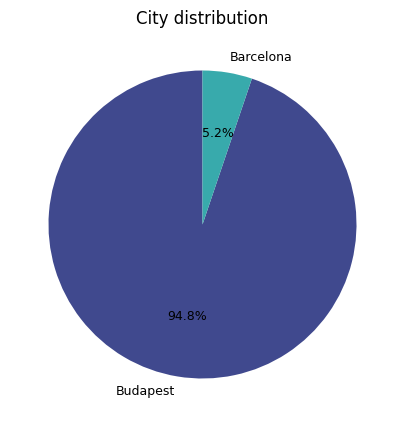

In [51]:
# Define the 'mako' color palette from Seaborn
colors = sns.color_palette("mako", n_colors=len(df['City'].value_counts()))

# Create a pie chart using the 'mako' color palette
plt.figure(figsize=(5, 5))
plt.pie(df['City'].value_counts(),
        labels=df['City'].value_counts().index,
        autopct='%1.1f%%', 
        textprops={'fontsize': 9}, 
        startangle=90,
        colors=colors)

plt.title('City distribution')
plt.show()

### `Score`vs `Price`

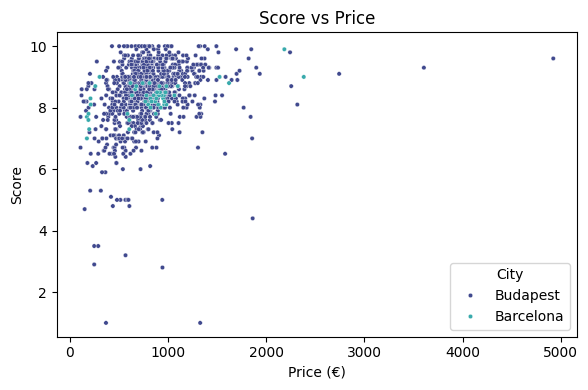

In [16]:
plt.figure(figsize = (6, 4))

sns.scatterplot(x = "Price (€)",
                y = "Score",
                data = df,
                hue = "City",
                palette= "mako",
                s = 10)
            
plt.xlabel("Price (€)")
plt.ylabel("Score")
plt.title("Score vs Price")

plt.tight_layout()
plt.show()

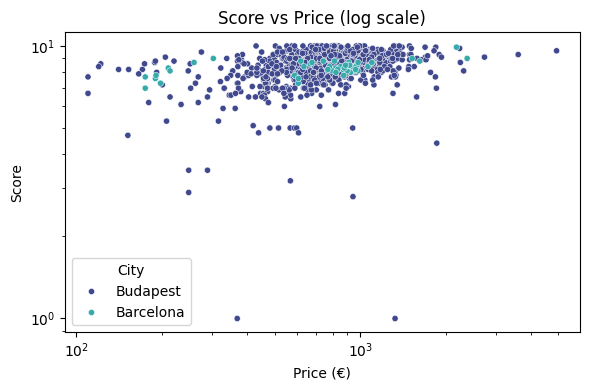

In [23]:
plt.figure(figsize = (6, 4))

sns.scatterplot(x = "Price (€)",
                y = "Score",
                data = df,
                hue = "City",
                palette= "mako",
                s = 20)
            
plt.xlabel("Price (€)")
plt.ylabel("Score")
plt.title("Score vs Price (log scale)")

# We can use a logarithmic scale to better view the results
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.show()

### `Price`and `Score`distribution by city

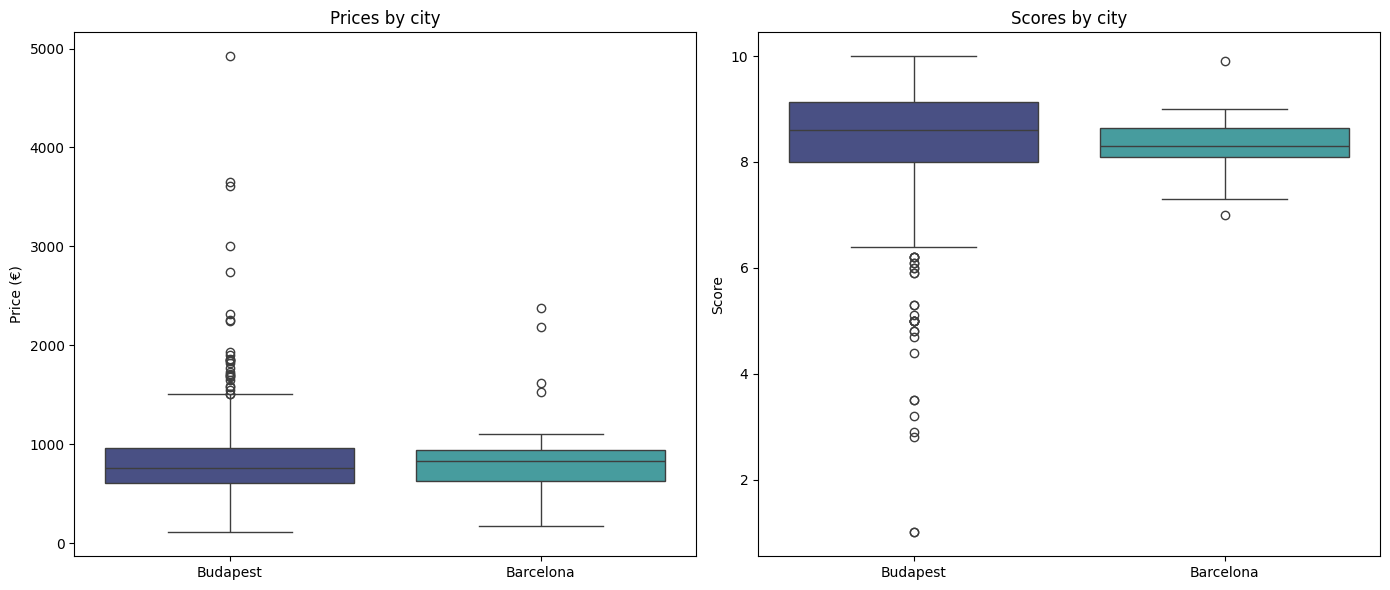

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for prices by city
sns.boxplot(x='City', y='Price (€)', data=df, ax=axes[0], palette='mako')
axes[0].set_title('Prices by city')
axes[0].set_xlabel('')
axes[0].set_ylabel('Price (€)')

# Boxplot for scores by city
sns.boxplot(x='City', y='Score', data=df, ax=axes[1], palette='mako')
axes[1].set_title('Scores by city')
axes[1].set_xlabel('')
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

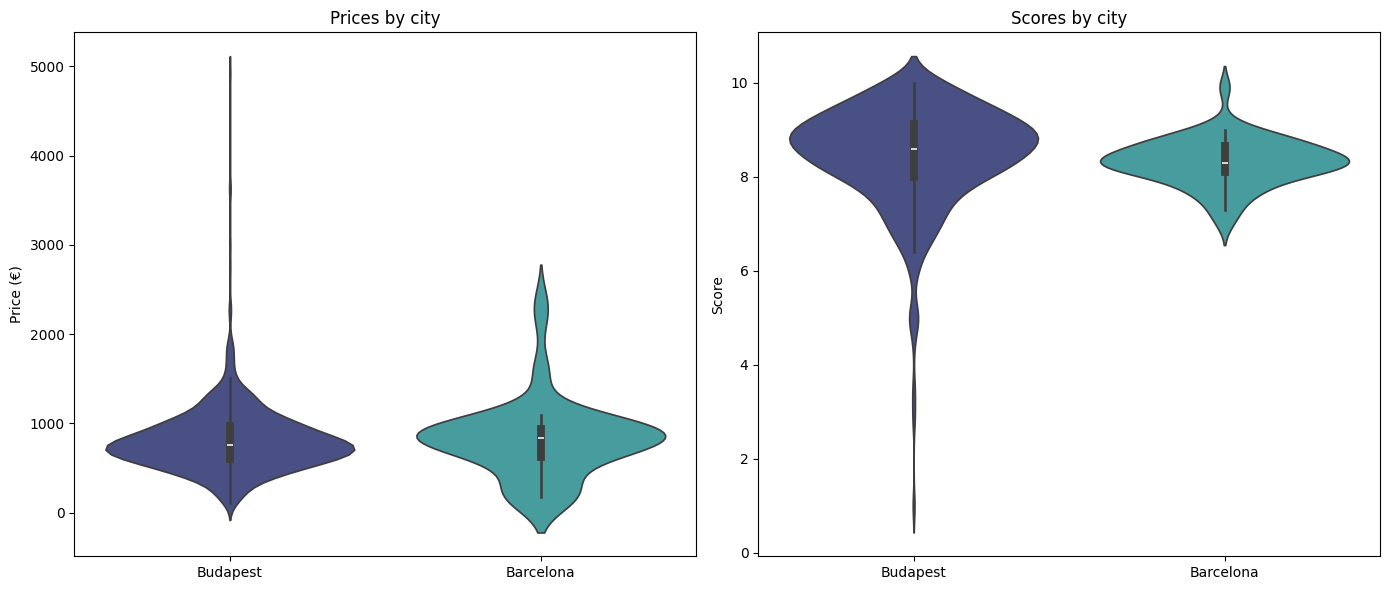

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for prices by city
sns.violinplot(x='City', y='Price (€)', data=df, ax=axes[0], palette='mako')
axes[0].set_title('Prices by city')
axes[0].set_xlabel('')
axes[0].set_ylabel('Price (€)')

# Boxplot for scores by city
sns.violinplot(x='City', y='Score', data=df, ax=axes[1], palette='mako')
axes[1].set_title('Scores by city')
axes[1].set_xlabel('')
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

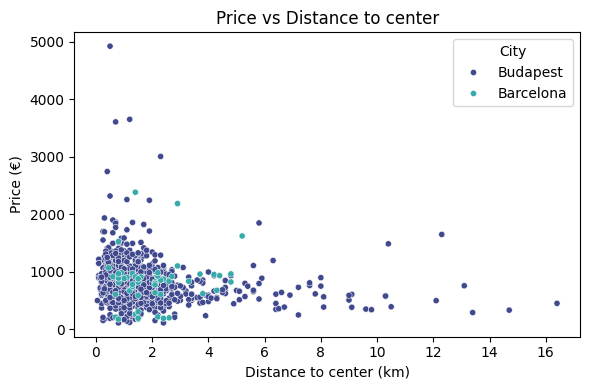

In [28]:
plt.figure(figsize = (6, 4))

sns.scatterplot(x = "Distance to center",
                y = "Price (€)",
                data = df,
                hue = "City",
                palette= "mako",
                s = 20)
            
plt.xlabel("Distance to center (km)")
plt.ylabel("Price (€)")
plt.title("Price vs Distance to center")

plt.tight_layout()
plt.show()

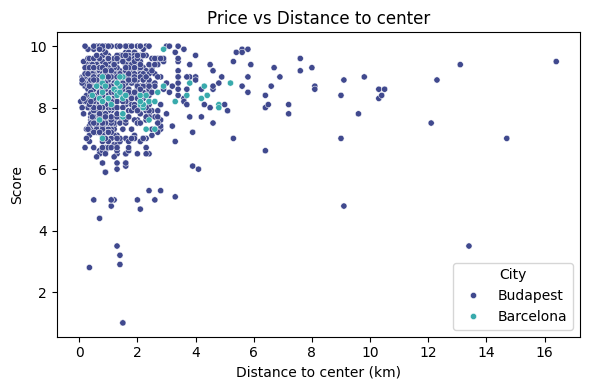

In [29]:
plt.figure(figsize = (6, 4))

sns.scatterplot(x = "Distance to center",
                y = "Score",
                data = df,
                hue = "City",
                palette= "mako",
                s = 20)
            
plt.xlabel("Distance to center (km)")
plt.ylabel("Score")
plt.title("Price vs Distance to center")

plt.tight_layout()
plt.show()

In [41]:
df['City'].value_counts()

City
Budapest     930
Barcelona     51
Name: count, dtype: int64